### Import Library

In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve
import seaborn as sns

# importing classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
# Loading the merged dataset
data = pd.read_csv('/kaggle/input/ecgsignal/ECGSignal_Data.csv')
data.drop(columns = ['Unnamed: 0'], inplace = True)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,-0.135,-0.115,-0.105,-0.105,-0.115,-0.115,-0.115,-0.105,-0.105,-0.135,...,0.075,0.035,-0.025,-0.055,-0.075,-0.115,-0.135,-0.135,-0.135,0
1,-0.105,-0.095,-0.085,-0.095,-0.095,-0.105,-0.085,-0.095,-0.095,-0.105,...,0.025,-0.025,-0.055,-0.105,-0.145,-0.155,-0.165,-0.165,-0.185,0
2,-0.105,-0.115,-0.125,-0.105,-0.115,-0.105,-0.105,-0.095,-0.095,-0.105,...,0.065,0.005,-0.045,-0.075,-0.105,-0.115,-0.115,-0.135,-0.125,0
3,-0.075,-0.075,-0.085,-0.075,-0.075,-0.075,-0.065,-0.075,-0.065,-0.065,...,0.085,0.035,-0.005,-0.065,-0.055,-0.095,-0.095,-0.105,-0.125,0
4,-0.065,-0.085,-0.075,-0.065,-0.075,-0.045,-0.055,-0.075,-0.065,-0.065,...,0.085,0.015,-0.045,-0.085,-0.135,-0.135,-0.155,-0.155,-0.165,0


In [3]:
X = data.iloc[:, :-1]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,-0.135,-0.115,-0.105,-0.105,-0.115,-0.115,-0.115,-0.105,-0.105,-0.135,...,0.175,0.075,0.035,-0.025,-0.055,-0.075,-0.115,-0.135,-0.135,-0.135
1,-0.105,-0.095,-0.085,-0.095,-0.095,-0.105,-0.085,-0.095,-0.095,-0.105,...,0.095,0.025,-0.025,-0.055,-0.105,-0.145,-0.155,-0.165,-0.165,-0.185
2,-0.105,-0.115,-0.125,-0.105,-0.115,-0.105,-0.105,-0.095,-0.095,-0.105,...,0.135,0.065,0.005,-0.045,-0.075,-0.105,-0.115,-0.115,-0.135,-0.125
3,-0.075,-0.075,-0.085,-0.075,-0.075,-0.075,-0.065,-0.075,-0.065,-0.065,...,0.165,0.085,0.035,-0.005,-0.065,-0.055,-0.095,-0.095,-0.105,-0.125
4,-0.065,-0.085,-0.075,-0.065,-0.075,-0.045,-0.055,-0.075,-0.065,-0.065,...,0.155,0.085,0.015,-0.045,-0.085,-0.135,-0.135,-0.155,-0.155,-0.165


In [4]:
y = data.iloc[:, -1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 125, dtype: int64

In [5]:
print(f"The Shape of the X: {X.shape}")
print(f"The Shape of the y: {y.shape}")

The Shape of the X: (189459, 125)
The Shape of the y: (189459,)


### Dividing Dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Without Sampling

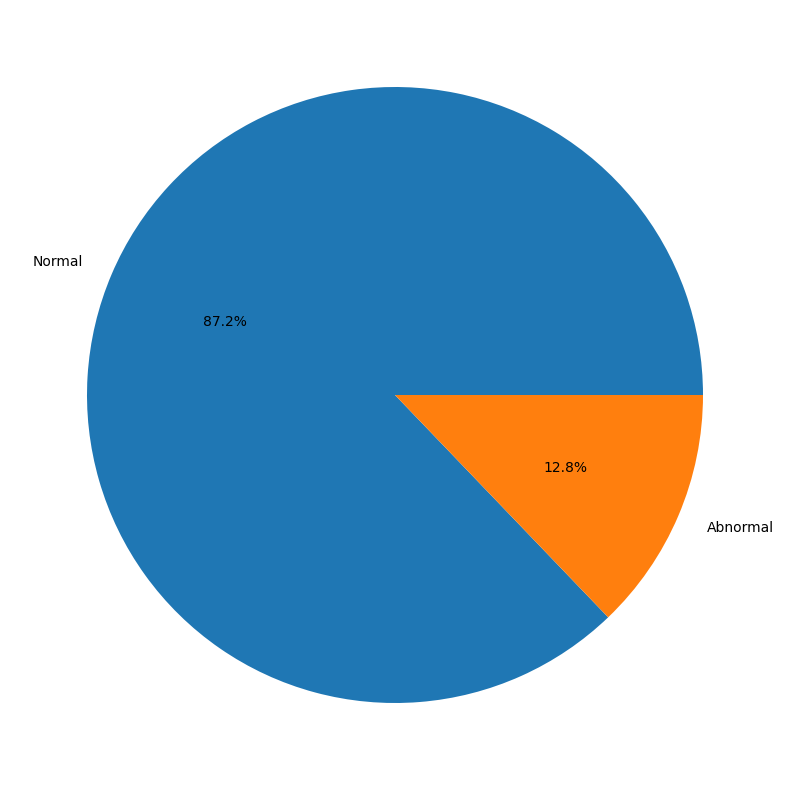

In [7]:
per_classes = data.iloc[:, -1].value_counts()
plt.figure(figsize=(20,10))
plt.pie(per_classes, labels=['Normal', 'Abnormal'], colors=['tab:blue','tab:orange'],autopct='%1.1f%%')
plt.show()

## Model Training code

In [8]:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    # Predict values
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Get model name
    model_name = model.__class__.__name__

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
        
    plt.figure(figsize=(15, 3))
    plt.subplot(1, 3, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
        
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.subplot(1, 3, 2)
    plt.plot(recall, precision, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
        
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 3, 3)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix - {model_name}')
        
    plt.tight_layout()
    plt.show()


## Model define and Prediction

In [9]:
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='saga', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [10]:
clfs = {
    'LR': lrc,
    'KN' : knc, 
    'DT': dtc,  
    'RF': rfc, 
    'AdaBoost': abc,  
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [11]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

In [12]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision, current_recall, current_f1 = train_classifier(clf, X_train, y_train, X_test, y_test)

    print(f"For Algorithm {name} the Accuracy: {current_accuracy}, Precision: {current_precision}, Recall: {current_recall}, f1_score: {current_f1}")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For Algorithm LR the Accuracy: 0.9004539216721208, Precision: 0.8882480173035328, Recall: 0.254073004743246, f1_score: 0.39512508017960224
For Algorithm KN the Accuracy: 0.9765121925472395, Precision: 0.9512195121951219, Recall: 0.8605898123324397, f1_score: 0.9036379385015159
For Algorithm DT the Accuracy: 0.9216457299693867, Precision: 0.877207062600321, Recall: 0.4508146009486492, f1_score: 0.5955591881215094
For Algorithm RF the Accuracy: 0.97297582603188, Precision: 0.9605104743558873, Recall: 0.8226438440915653, f1_score: 0.8862475005554322
For Algorithm AdaBoost the Accuracy: 0.9118019634751399, Precision: 0.8027320208919244, Recall: 0.4120437203547123, f1_score: 0.544562551103843
For Algorithm ETC the Accuracy: 0.9751926528027024, Precision: 0.9683680805176133, Recall: 0.8333677046813776, f1_score: 0.8958102416315673
For Algorithm GBDT the Accuracy: 0.9322020479256835, Precision: 0.930188679245283, Recall: 0.5083522375747577, f1_score: 0.6574209894652621
For Algorithm xgb the A

In [13]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'Recall': recall_scores, "F1_score": f1_scores}).sort_values('Precision',ascending=False)

performance_df

,Algorithm,Accuracy,Precision,Recall,F1_score
5,ETC,0.975193,0.968368,0.833368,0.895810
3,RF,0.972976,0.960510,0.822644,0.886248
1,KN,0.976512,0.951220,0.860590,0.903638
7,xgb,0.970178,0.939702,0.819550,0.875523
6,GBDT,0.932202,0.930189,0.508352,0.657421
0,LR,0.900454,0.888248,0.254073,0.395125
2,DT,0.921646,0.877207,0.450815,0.595559
4,AdaBoost,0.911802,0.802732,0.412044,0.544563


## Logistic Regression

In [14]:
# defining the model
lrc = LogisticRegression(solver='saga', penalty='l1')

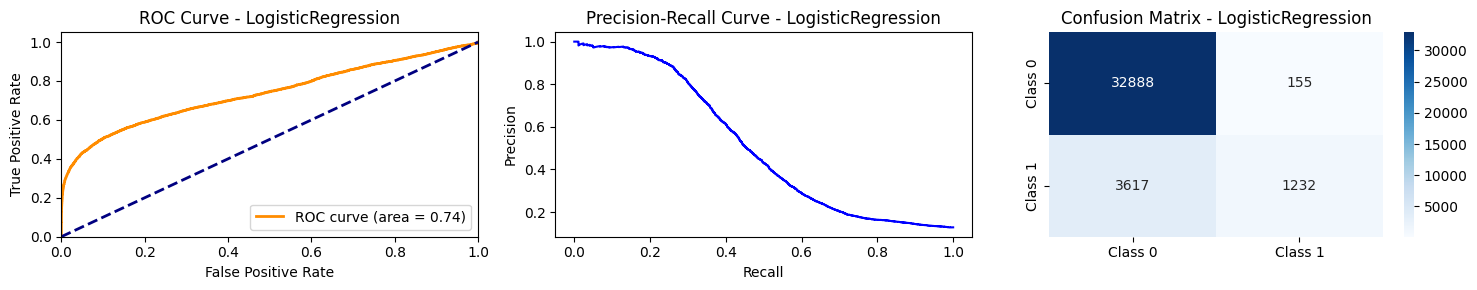

In [15]:
train_model(lrc, X_train, X_test, y_train, y_test)

* Positive values → Increase probability of predicting class 1
* Negative values → Increase probability of predicting class 0
* Near zero → Feature has little influence

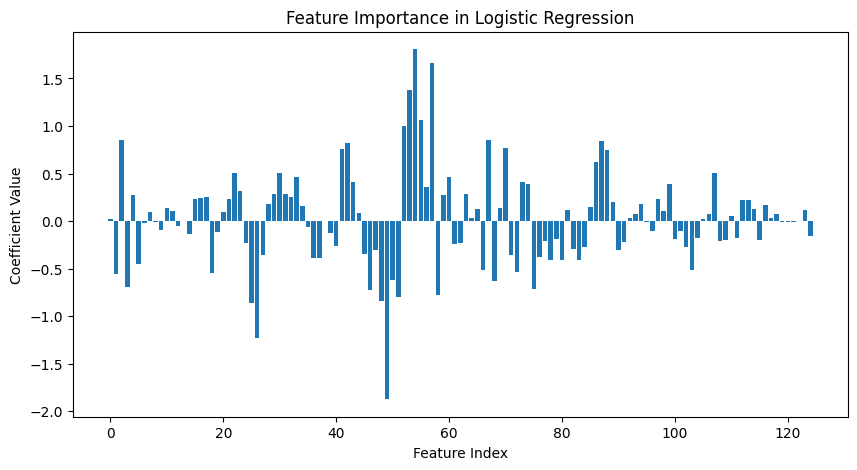

In [16]:
coefficients = lrc.coef_[0]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Logistic Regression")
plt.show()

## **SHAP Summary Plot Explanation**

The SHAP (SHapley Additive exPlanations) summary plot helps us understand how different features contribute to the model’s predictions.

---

### **📌 Understanding the Components of the SHAP Summary Plot**
#### **🔴 The Dots**
- Each dot represents a single instance (data point) from the dataset.
- The position of a dot shows the **SHAP value** for a specific feature in that instance.

#### **📏 X-Axis: SHAP Value (Impact on Model Output)**
- **Negative SHAP values** → Feature pushes the model prediction toward **Class 0**.
- **Positive SHAP values** → Feature pushes the model prediction toward **Class 1**.
- The farther a dot is from 0, the greater the feature’s impact on the prediction.

#### **📊 Y-Axis: Feature Index**
- Features are listed in **descending order of importance** (most important at the top).
- Example: Feature **67** is more important than **Feature 62**.

#### **🎨 Color: Feature Value**
- **🔴 Red** → High feature value.
- **🔵 Blue** → Low feature value.
- This helps us see how different feature values impact predictions.

---

### **🧐 How to Interpret the Plot**
1. **Feature 67 (Top Feature)**
   - High values (🔴 red) push the prediction toward **Class 1**.
   - Low values (🔵 blue) push the prediction toward **Class 0**.

2. **Feature 2 (Middle Feature)**
   - Less spread, meaning it has a weaker effect on predictions.

3. **Feature 62 (Bottom Feature)**
   - Most SHAP values are near **0**, meaning this feature has little impact.

---

### **🔍 Key Takeaways**
- Features at the **top** influence the model’s decisions the most.
- The **wider** the spread, the more variation in impact across instances.
- **Red dots on the right** and **blue dots on the left** indicate strong influence toward **Class 1** and **Class 0**, respectively.

---

### **📌 Want to Know What Feature 67 Represents?**
Use the following Python code:
```python
# Get feature names from a DataFrame
feature_names = X_train.columns

# Find the actual feature name corresponding to index 67
print("Feature 67:", feature_names[67])


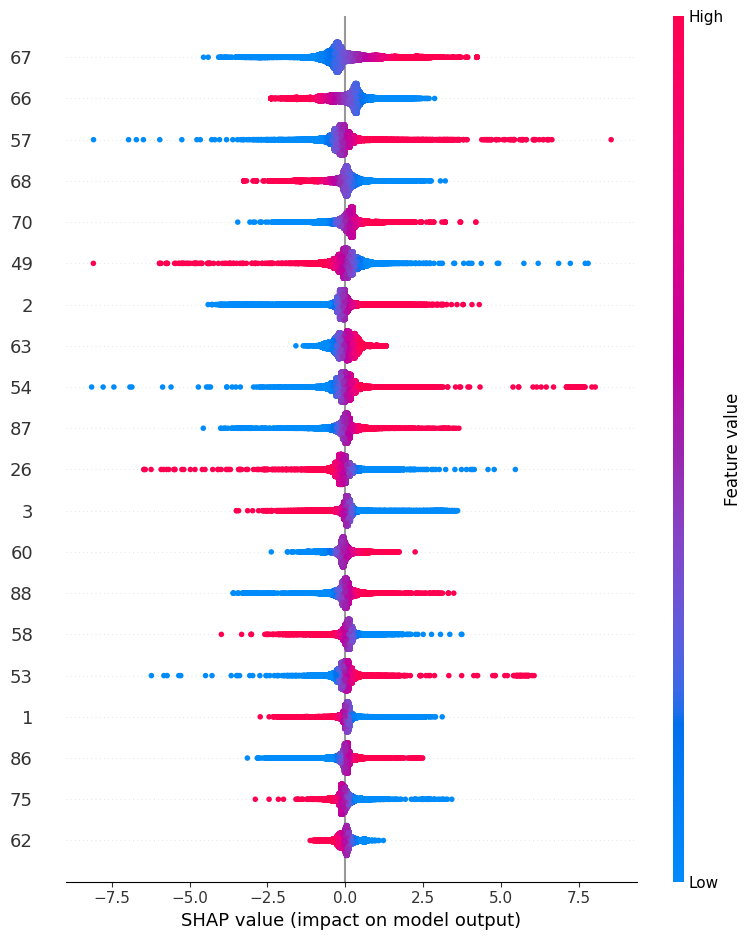

In [17]:
import shap

explainer = shap.Explainer(lrc, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


## KNN Algorithm

In [18]:
knc = KNeighborsClassifier(n_neighbors=5)

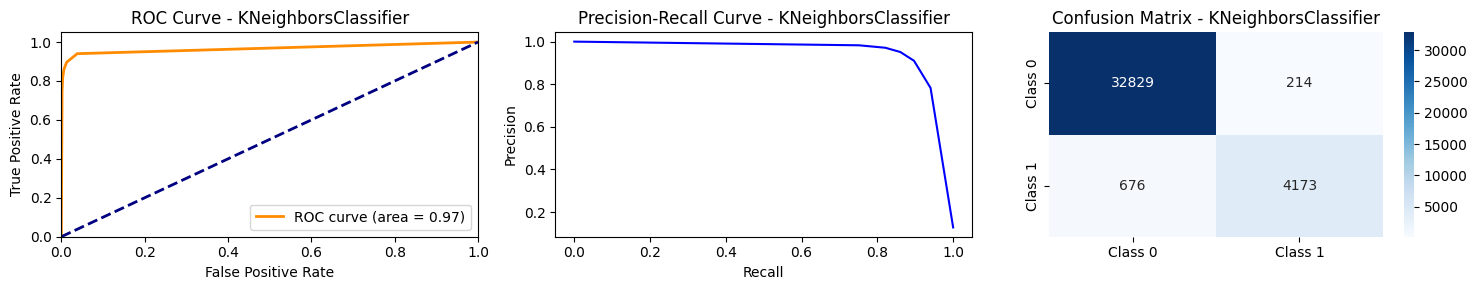

In [19]:
train_model(knc, X_train, X_test, y_train, y_test)

  0%|          | 0/10 [00:00<?, ?it/s]

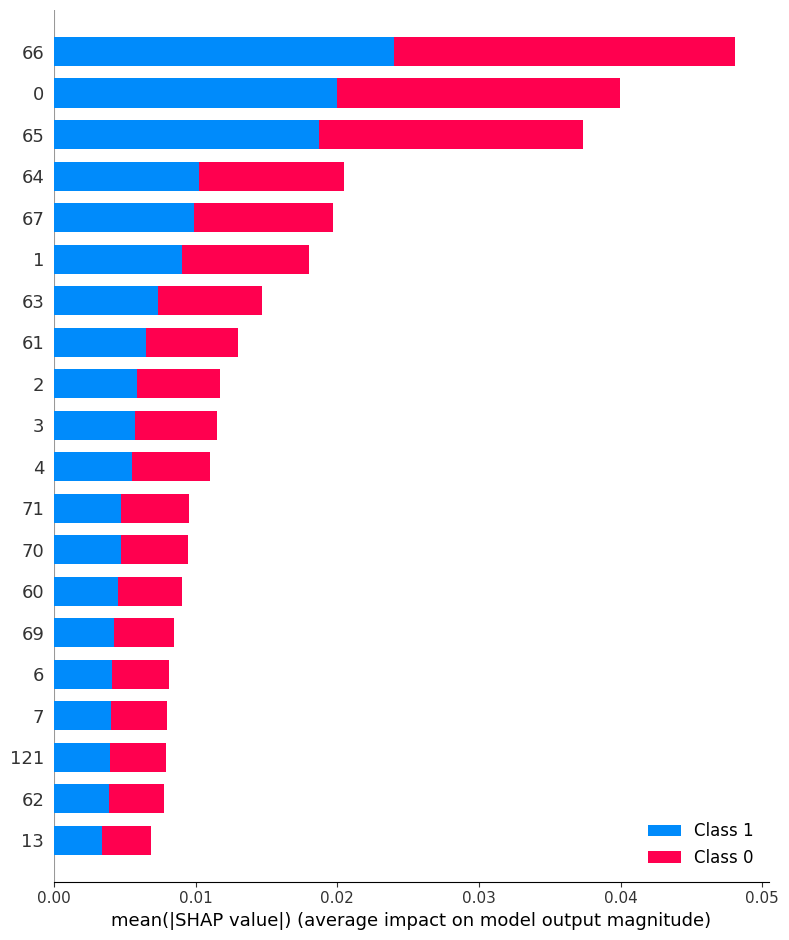

In [20]:
explainer = shap.KernelExplainer(knc.predict_proba , X_train[:50]) 
shap_values = explainer.shap_values(X_test.iloc[:10]) 

shap.summary_plot(shap_values, X_test.iloc[:10])

## Decision Tree Classifier

In [21]:
dtc = DecisionTreeClassifier(max_depth=5)

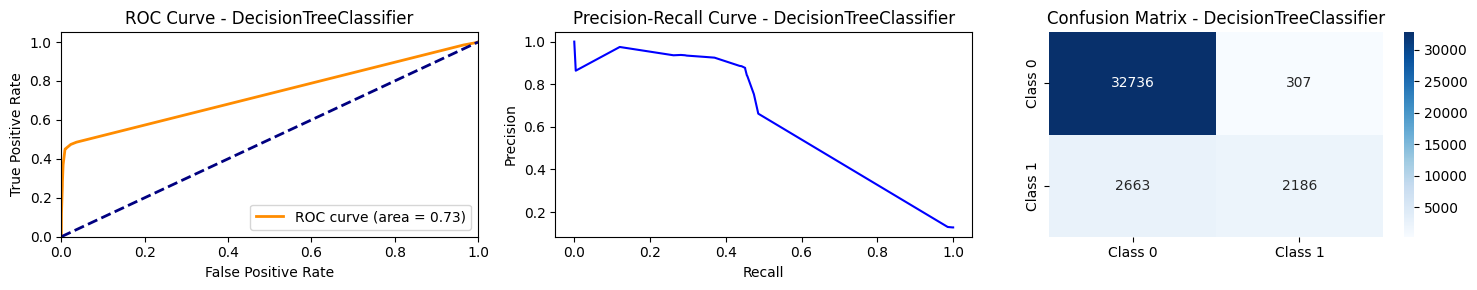

In [22]:
train_model(dtc, X_train, X_test, y_train, y_test)

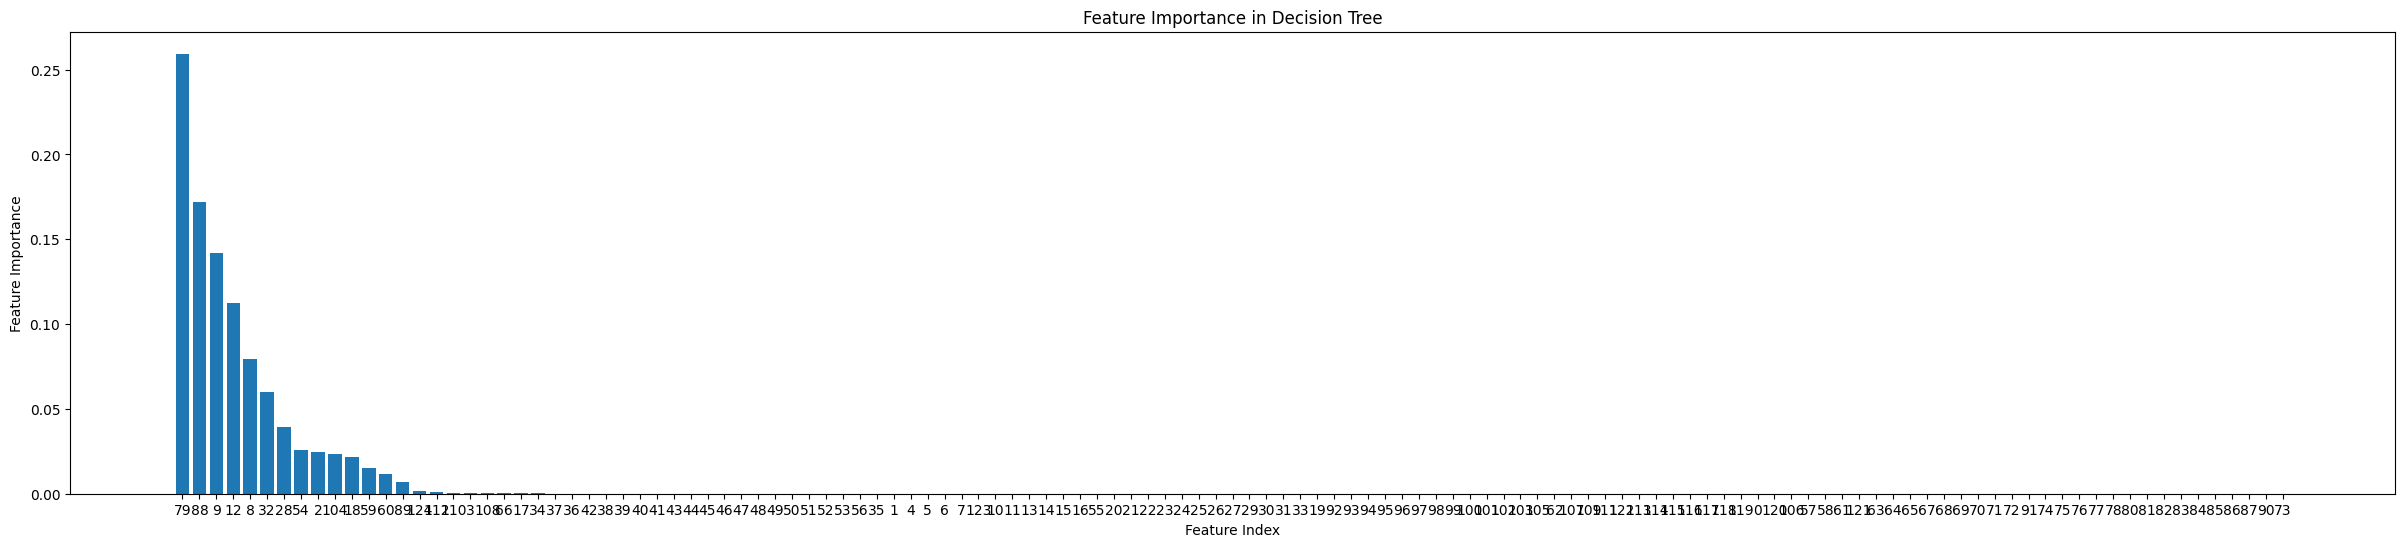

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the trained decision tree model
importances = dtc.feature_importances_

# Sort feature importance in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(30, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), indices)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance in Decision Tree")
plt.show()


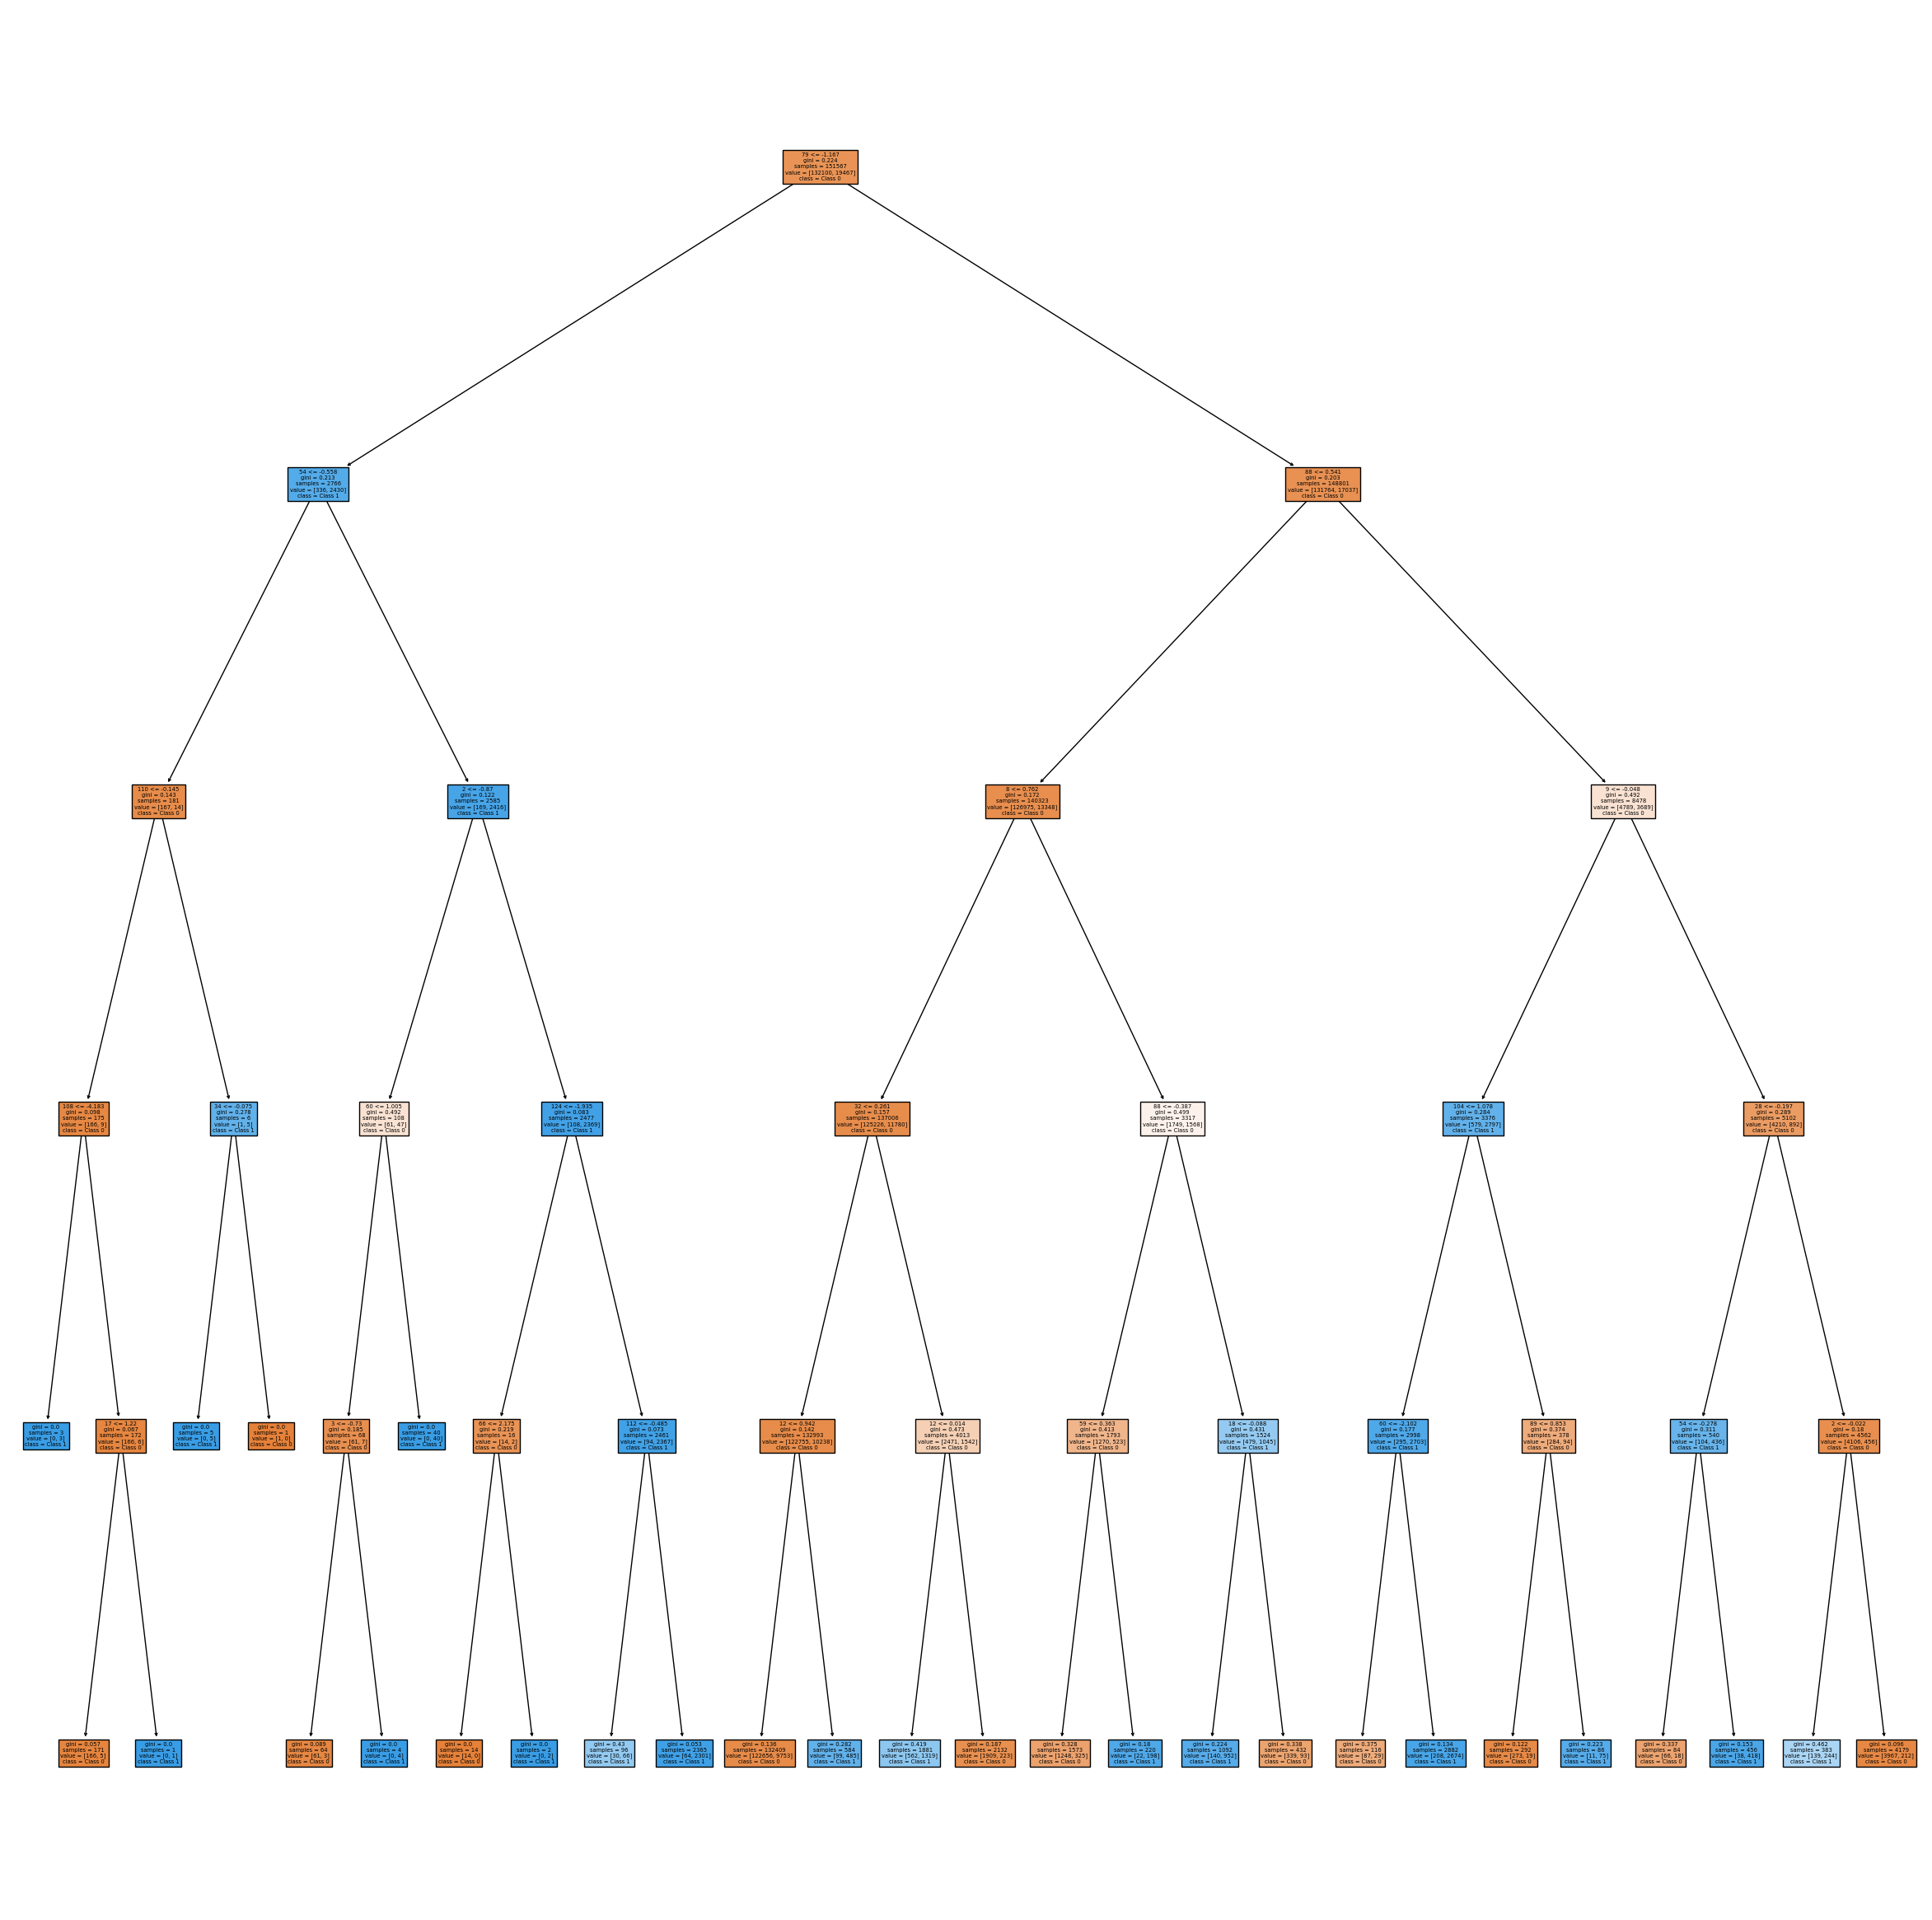

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 30))
plot_tree(dtc, feature_names=[str(i) for i in range(X_train.shape[1])], class_names=["Class 0", "Class 1"], filled=True)
plt.show()


## Random Forest Classifier

In [25]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

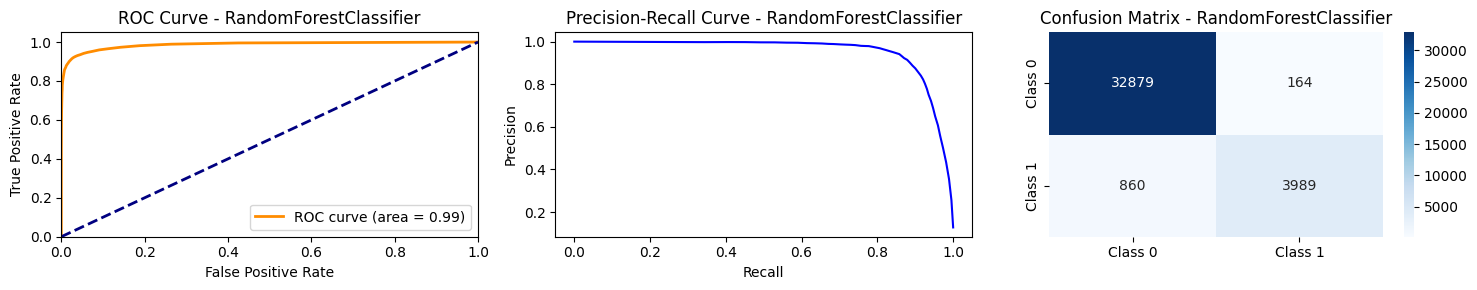

In [26]:
train_model(rfc, X_train, X_test, y_train, y_test)

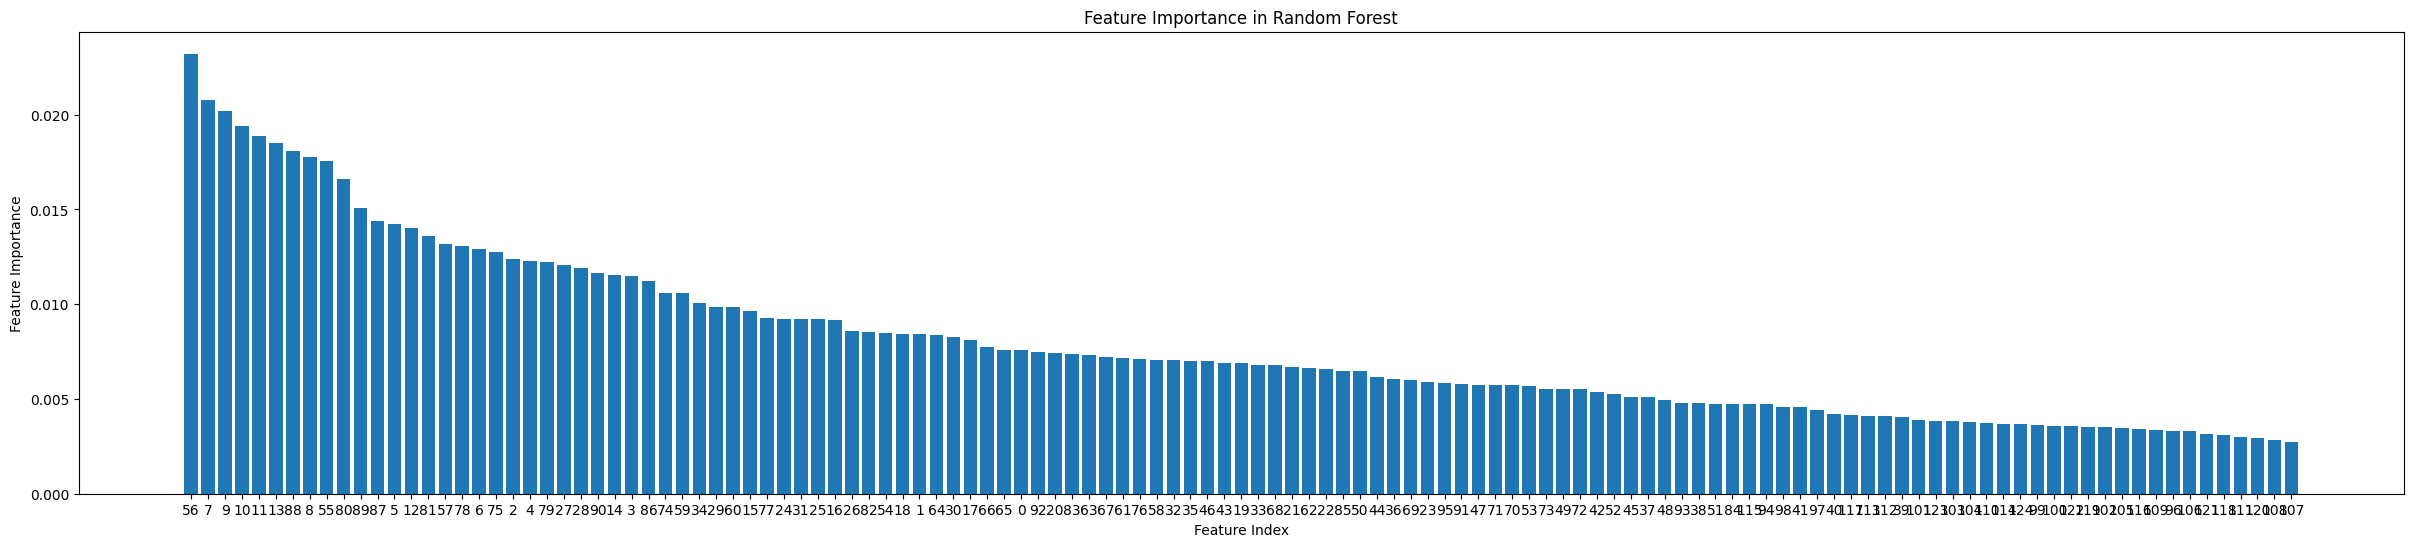

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the trained Random Forest model
importances = rfc.feature_importances_

# Sort feature importance in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(30, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), indices)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()


## Ada Boost Classifier

In [28]:
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

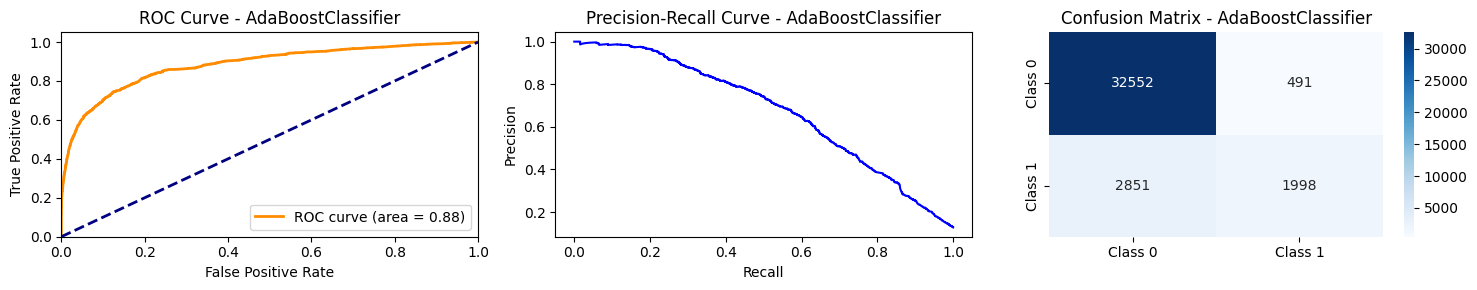

In [29]:
train_model(abc, X_train, X_test, y_train, y_test)

## Extra Tree Classifier

In [30]:
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

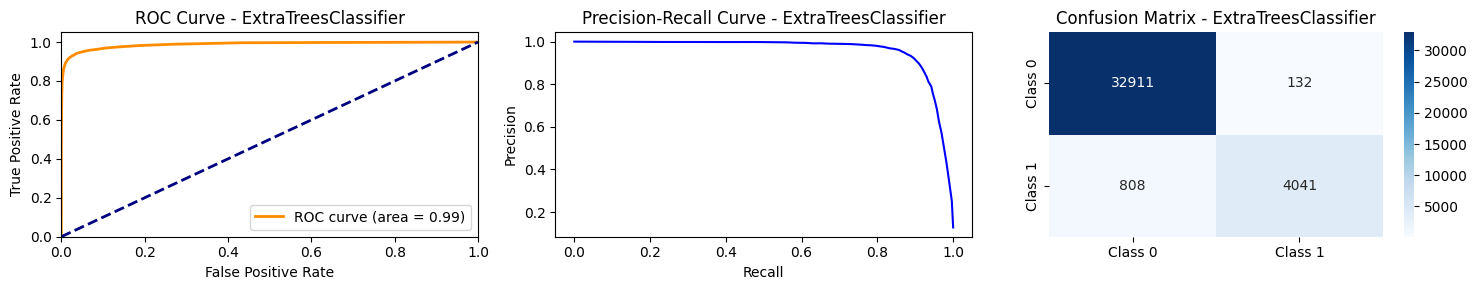

In [31]:
train_model(etc, X_train, X_test, y_train, y_test)

## Gradient Boosting classifier

In [32]:
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

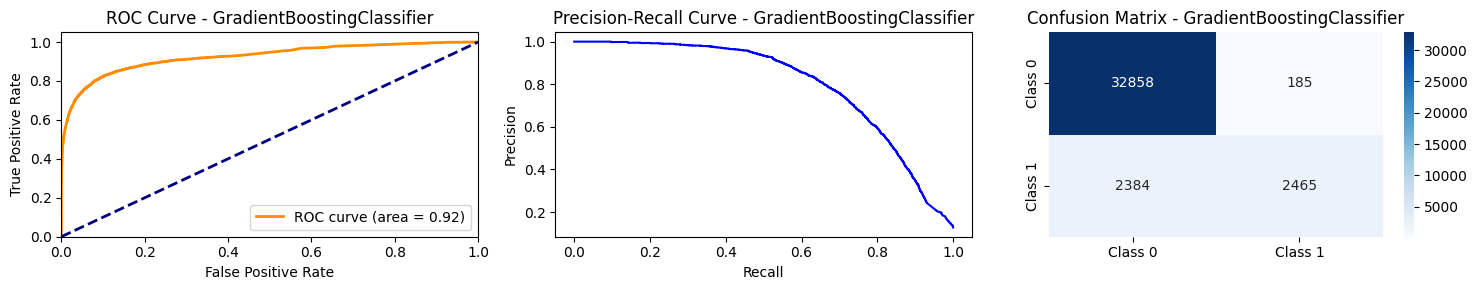

In [33]:
train_model(gbdt, X_train, X_test, y_train, y_test)

## XG Boost

In [34]:
xgb = XGBClassifier(n_estimators=50,random_state=2)

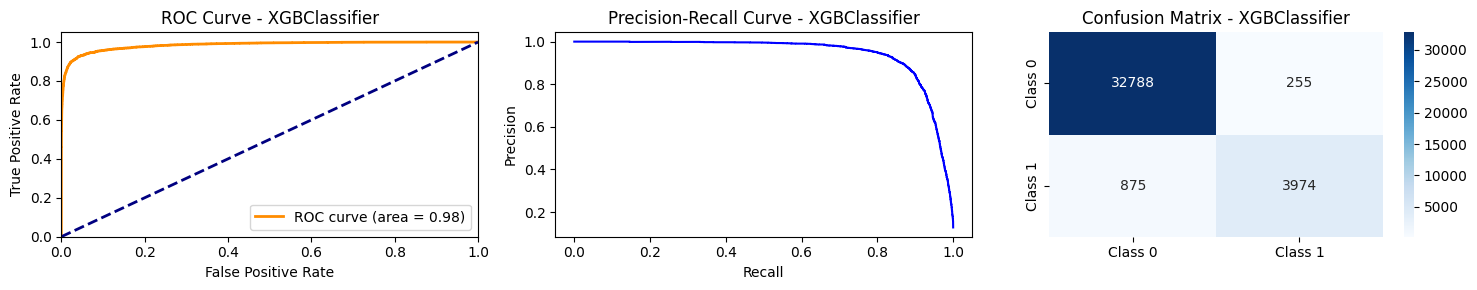

In [35]:
train_model(xgb, X_train, X_test, y_train, y_test)

## After Sampling

In [36]:
# Increasing the data
sm = SMOTE(k_neighbors=6)
updated_X, updated_y = sm.fit_resample(X, y)

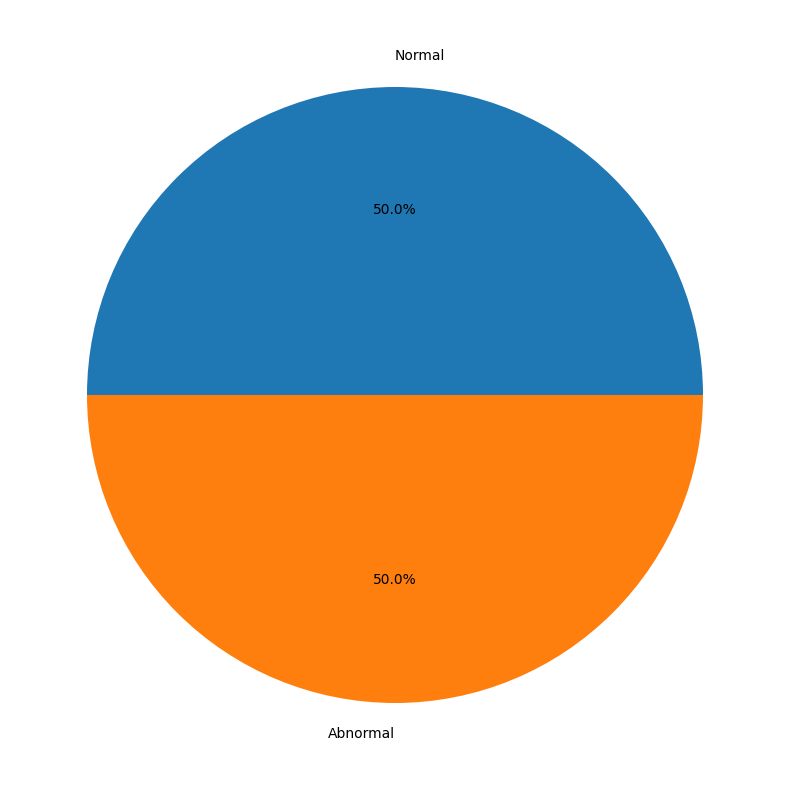

In [37]:
# Checking the class size
per_classes = updated_y.value_counts()
plt.figure(figsize=(20,10))
plt.pie(per_classes, labels=['Normal', 'Abnormal'], colors=['tab:blue','tab:orange'],autopct='%1.1f%%')
plt.show()

In [38]:
train_x, test_x, train_y, test_y = train_test_split(updated_X, updated_y, test_size = 0.2, random_state=42)

In [39]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision, current_recall, current_f1 = train_classifier(clf, train_x, train_y, test_x, test_y)

    print(f"For Algorithm {name} the Accuracy: {current_accuracy}, Precision: {current_precision}, Recall: {current_recall}, f1_score: {current_f1}")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For Algorithm LR the Accuracy: 0.6990372097247873, Precision: 0.7662926809510309, Recall: 0.572782319103845, f1_score: 0.655555363052028
For Algorithm KN the Accuracy: 0.9808653001907415, Precision: 0.9666803784450844, Recall: 0.9960641840750832, f1_score: 0.9811523321006799
For Algorithm DT the Accuracy: 0.786838838596385, Precision: 0.9248083217504371, Recall: 0.6244626097487133, f1_score: 0.7455225633889361
For Algorithm RF the Accuracy: 0.9845741620999727, Precision: 0.9864450050147403, Recall: 0.9826521344232516, f1_score: 0.9845449168094885
For Algorithm AdaBoost the Accuracy: 0.8159344818190075, Precision: 0.8626081517773376, Recall: 0.7515894641235241, f1_score: 0.8032810755715187
For Algorithm ETC the Accuracy: 0.9891459020860456, Precision: 0.9902296932366417, Recall: 0.988041174689676, f1_score: 0.9891342234076408
For Algorithm GBDT the Accuracy: 0.8621817190953405, Precision: 0.9254570026317661, Recall: 0.7878292461398728, f1_score: 0.8511153267482173
For Algorithm xgb the 

In [40]:
smote_performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'Recall': recall_scores, "F1_score": f1_scores}).sort_values('Precision',ascending=False)

In [41]:
smote_performance_df

,Algorithm,Accuracy,Precision,Recall,F1_score
5,ETC,0.989146,0.990230,0.988041,0.989134
3,RF,0.984574,0.986445,0.982652,0.984545
7,xgb,0.955736,0.969702,0.940872,0.955069
1,KN,0.980865,0.966680,0.996064,0.981152
6,GBDT,0.862182,0.925457,0.787829,0.851115
2,DT,0.786839,0.924808,0.624463,0.745523
4,AdaBoost,0.815934,0.862608,0.751589,0.803281
0,LR,0.699037,0.766293,0.572782,0.655555


## Logistic regression with SMOTE

In [42]:
# defining the model
lrc = LogisticRegression(solver='saga', penalty='l1')

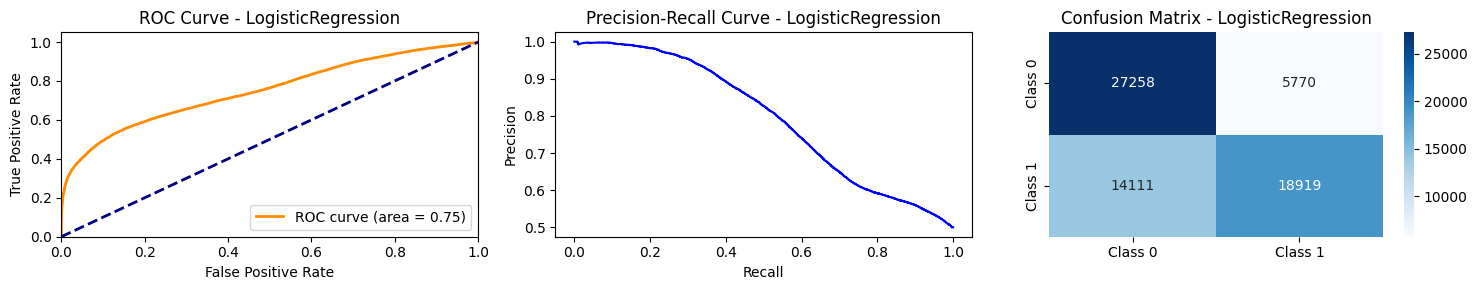

In [43]:
train_model(lrc, train_x, test_x, train_y, test_y)

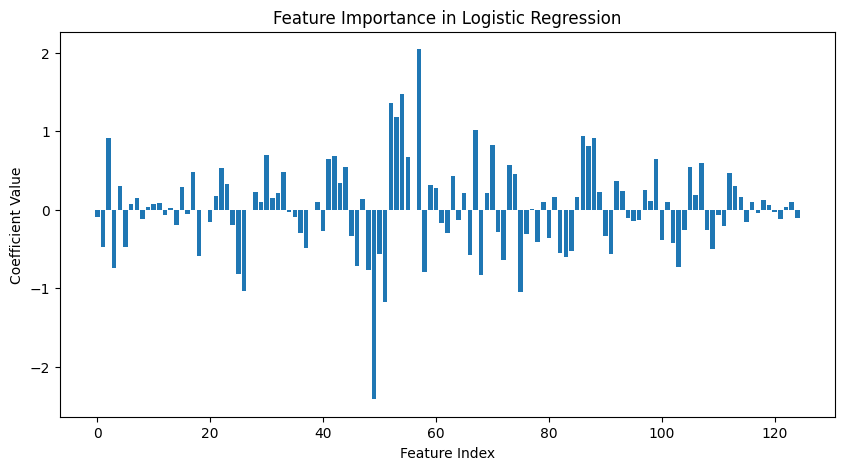

In [44]:
coefficients = lrc.coef_[0]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Logistic Regression")
plt.show()

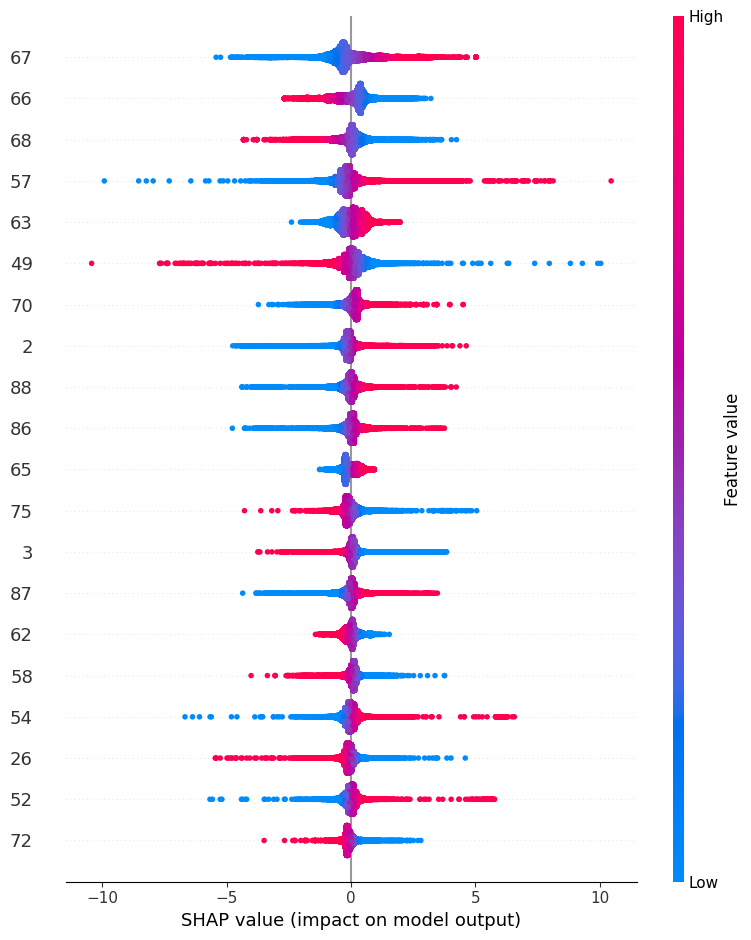

In [45]:
import shap

explainer = shap.Explainer(lrc, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


## KNN classifier with SMOTE

In [46]:
knc = KNeighborsClassifier(n_neighbors=5)

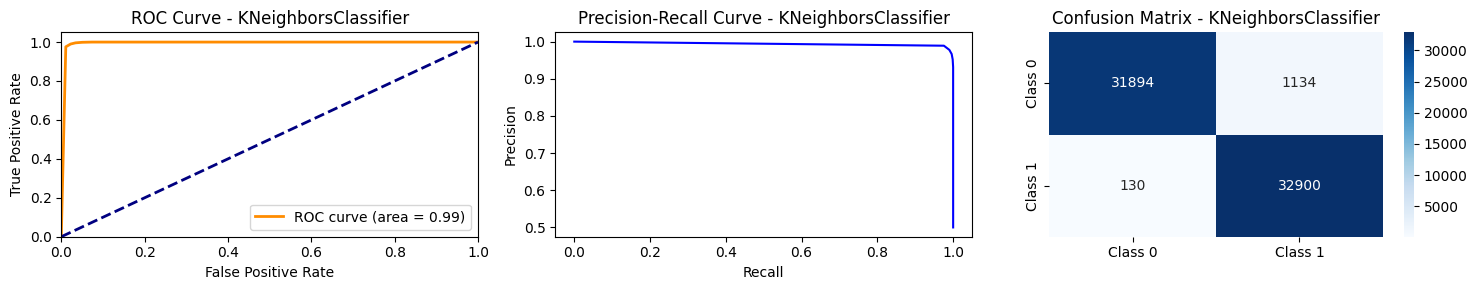

In [47]:
train_model(knc, train_x, test_x, train_y, test_y)

  0%|          | 0/10 [00:00<?, ?it/s]

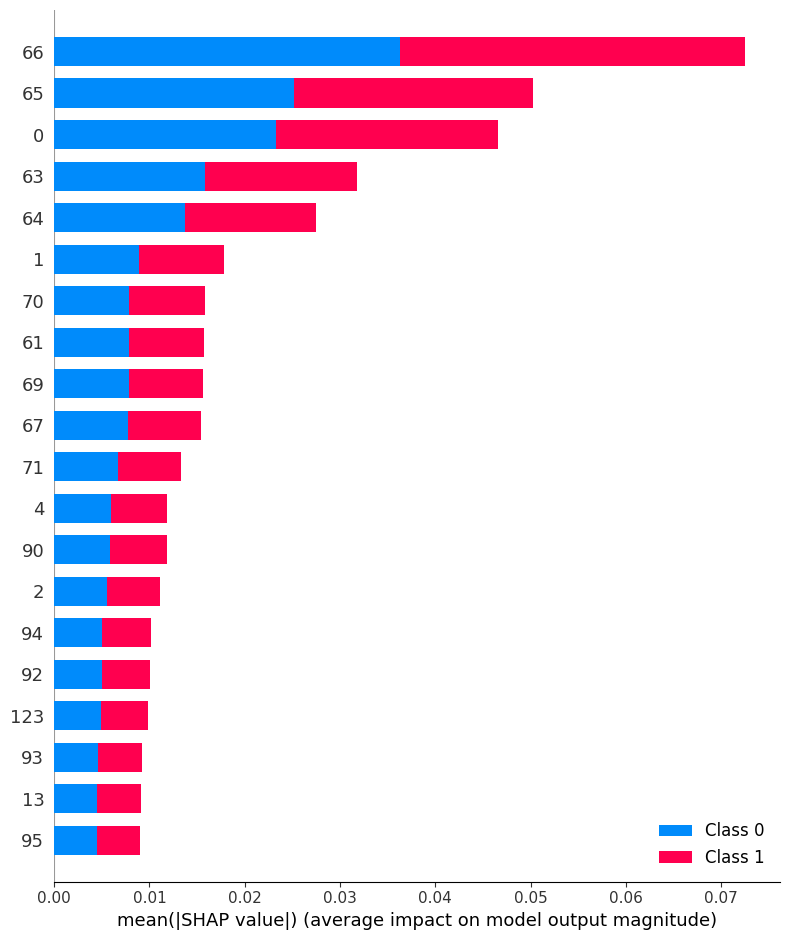

In [48]:
explainer = shap.KernelExplainer(knc.predict_proba , X_train[:50]) 
shap_values = explainer.shap_values(X_test.iloc[:10]) 

shap.summary_plot(shap_values, X_test.iloc[:10])

## Decision Tree with SMOTE

In [49]:
dtc = DecisionTreeClassifier(max_depth=5)

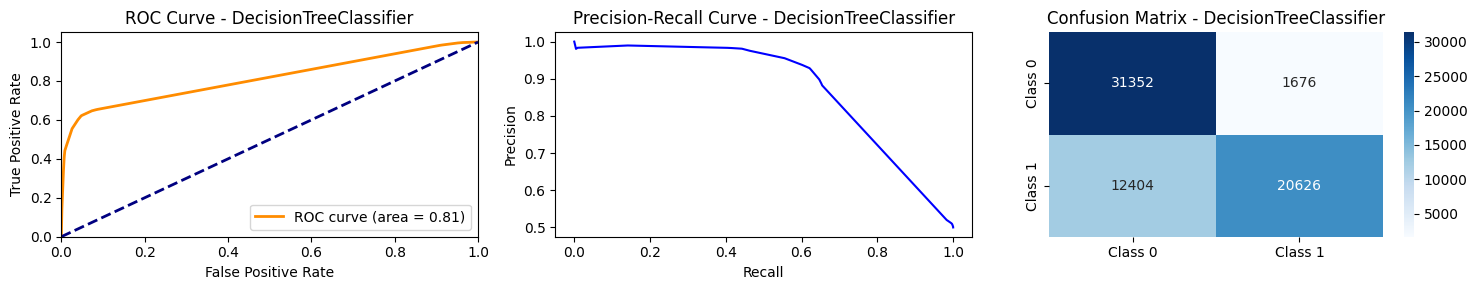

In [50]:
train_model(dtc, train_x, test_x, train_y, test_y)

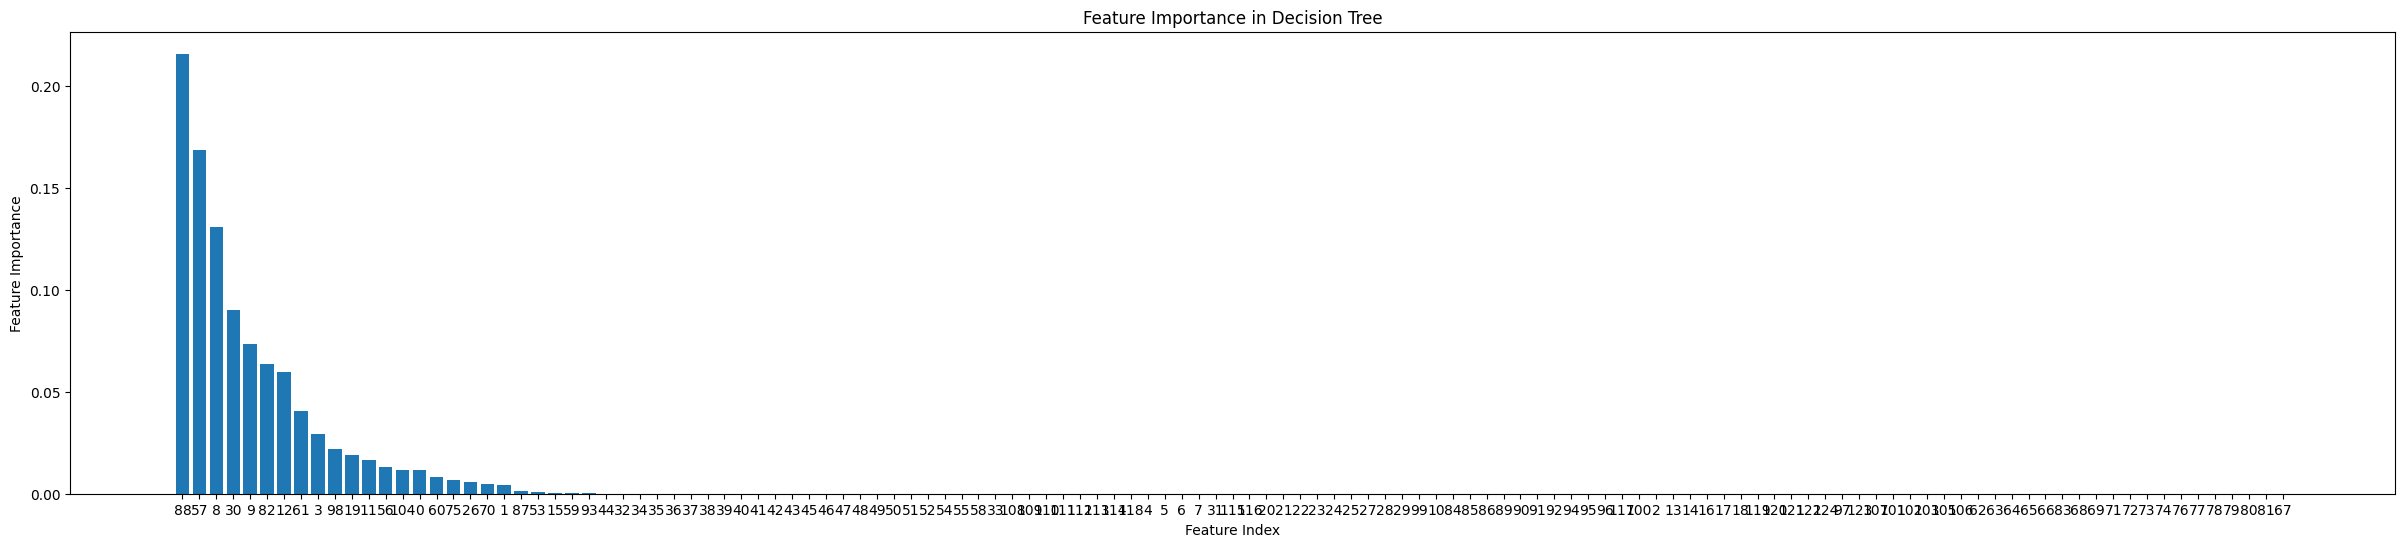

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the trained decision tree model
importances = dtc.feature_importances_

# Sort feature importance in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(30, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), indices)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance in Decision Tree")
plt.show()


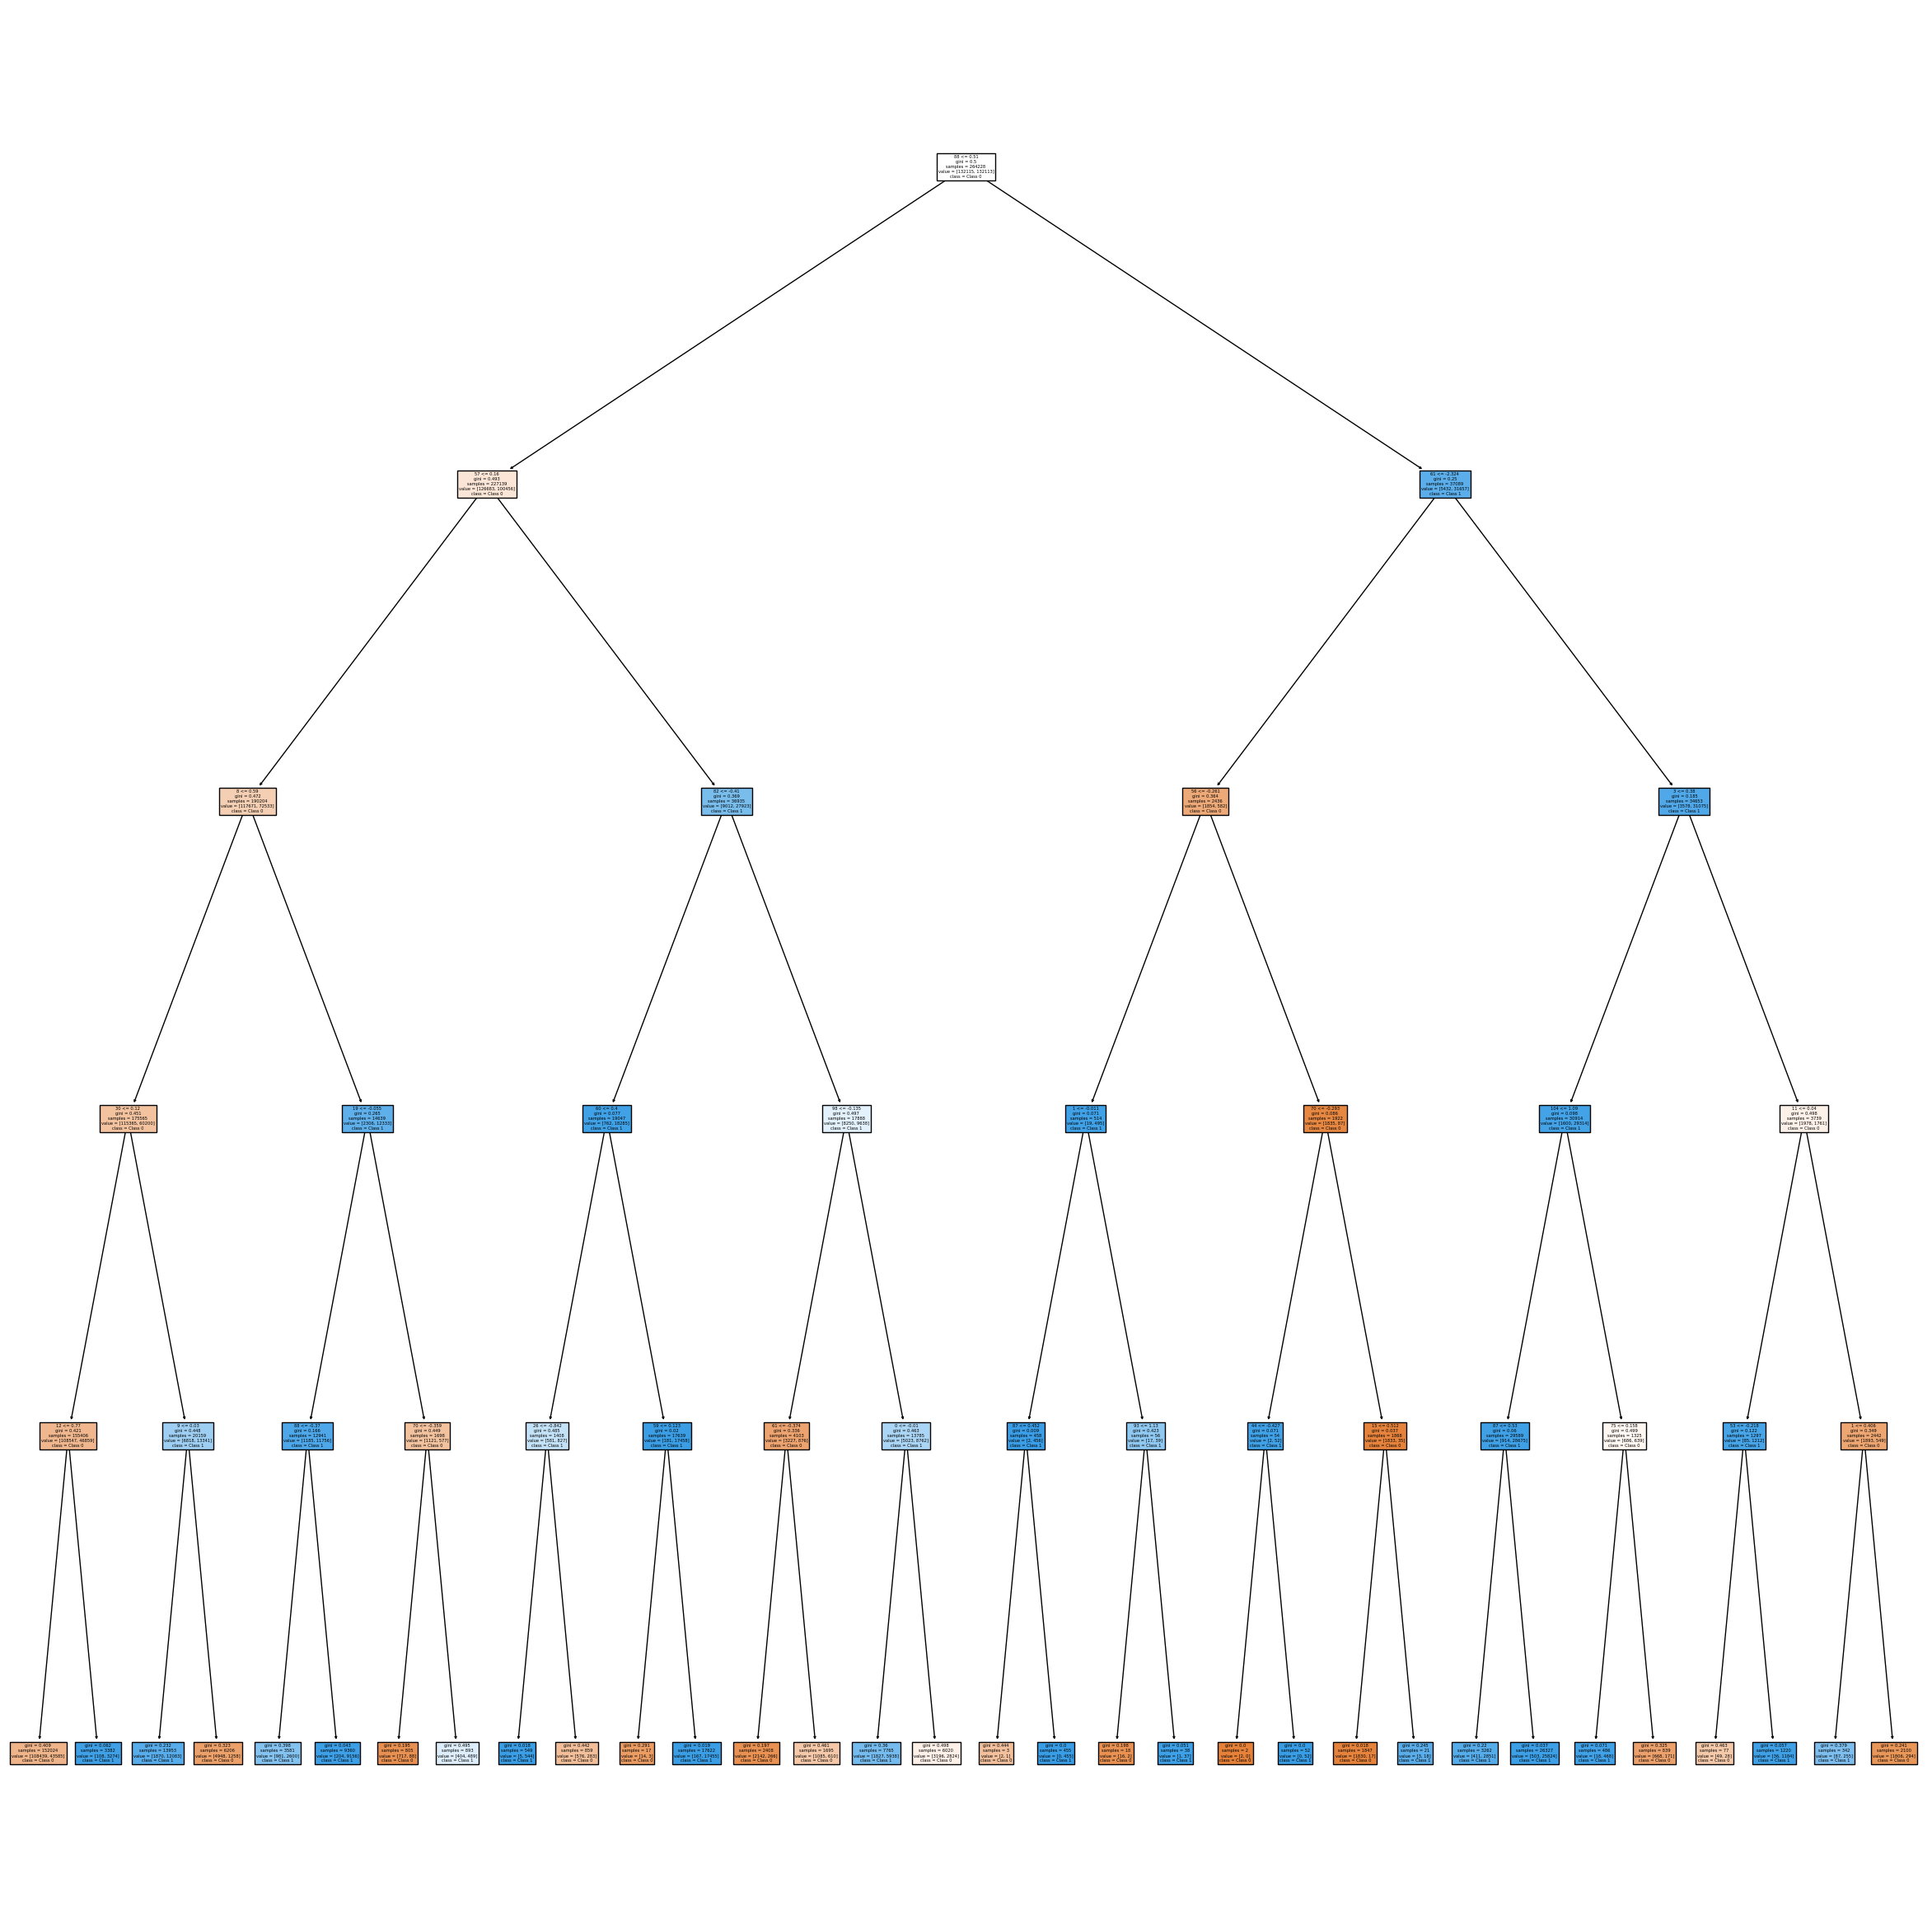

In [52]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 30))
plot_tree(dtc, feature_names=[str(i) for i in range(X_train.shape[1])], class_names=["Class 0", "Class 1"], filled=True)
plt.show()

## Random Forest Classifier with SMOTE

In [53]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

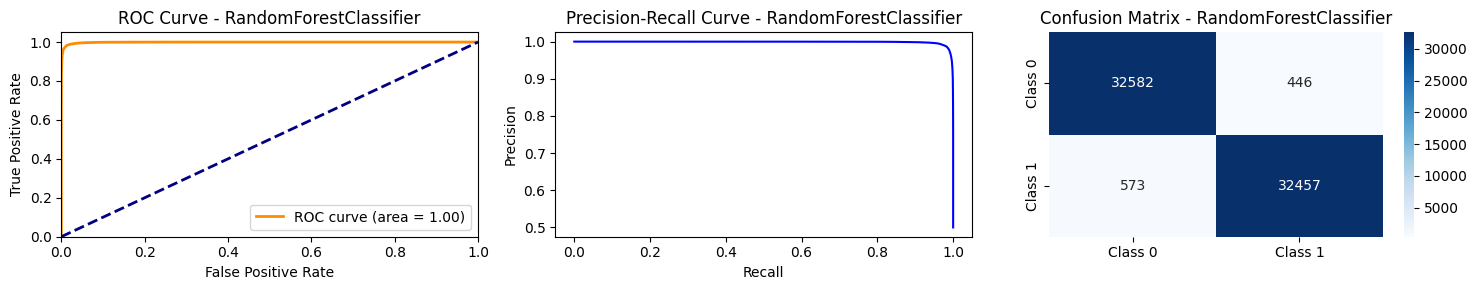

In [54]:
train_model(rfc, train_x, test_x, train_y, test_y)

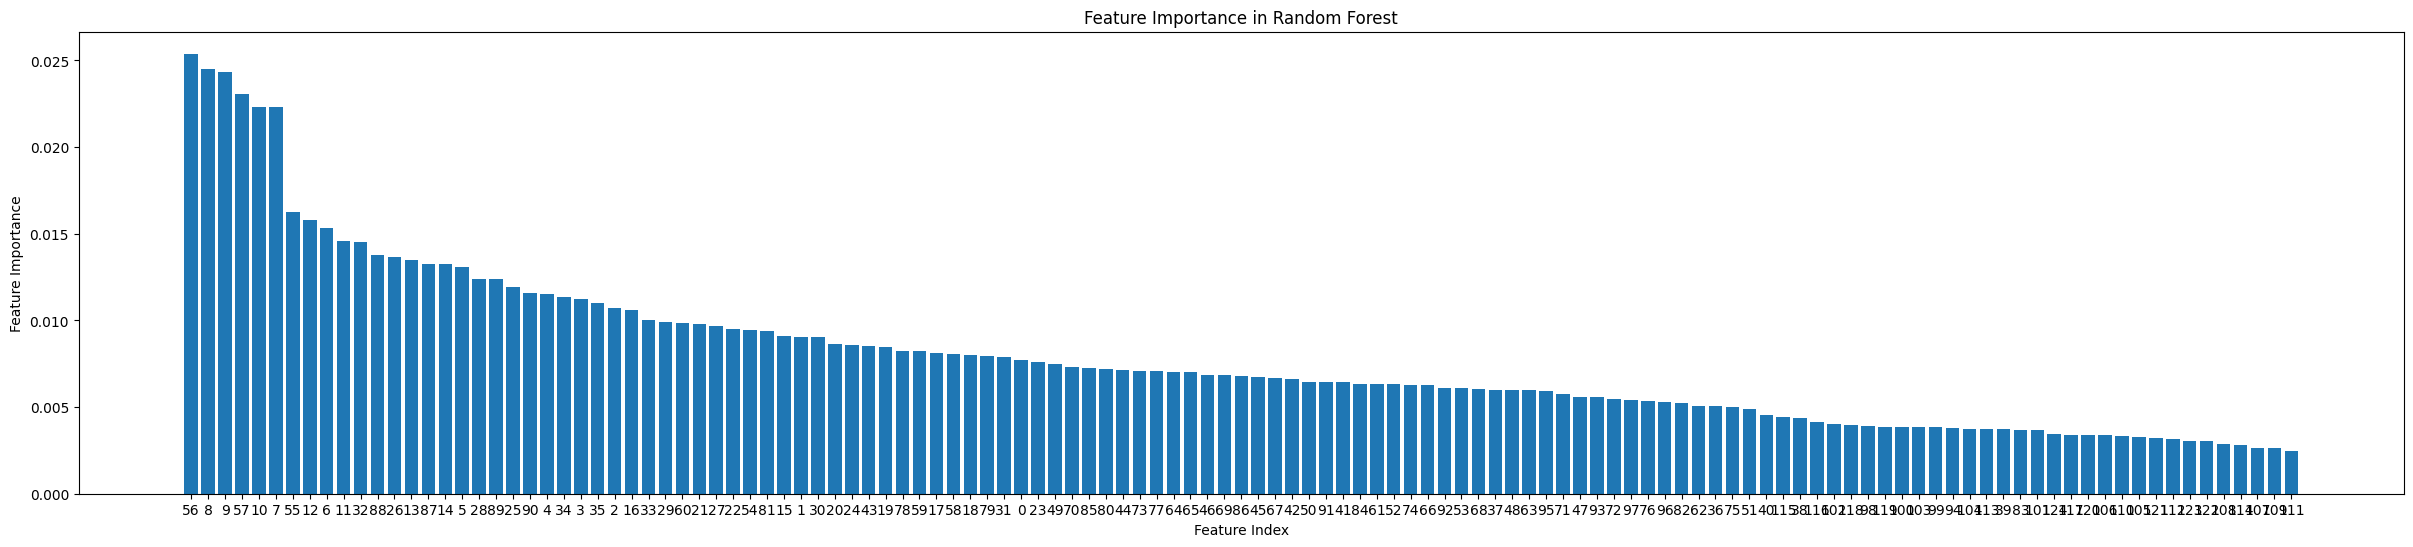

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the trained Random Forest model
importances = rfc.feature_importances_

# Sort feature importance in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(30, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), indices)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()


## Ada Boost Classifier with SMOTE

In [56]:
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

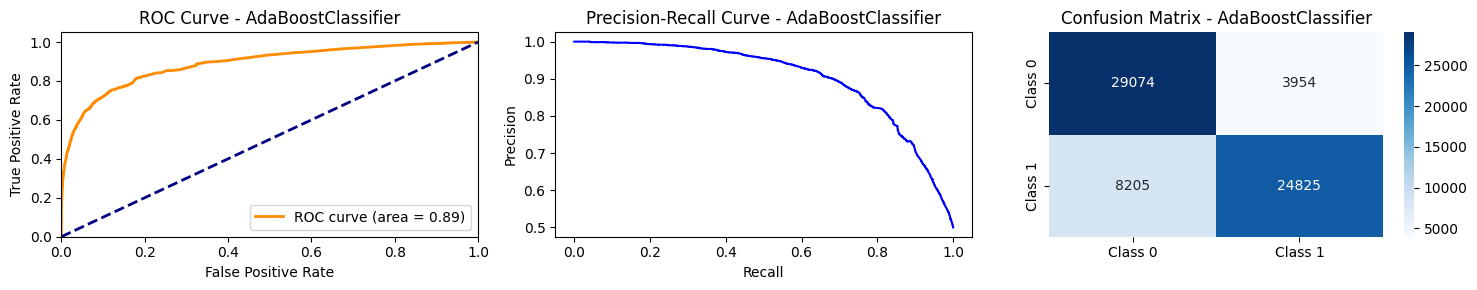

In [57]:
train_model(abc, train_x, test_x, train_y, test_y)

## Extra Tree classifier with SMOTE

In [58]:
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

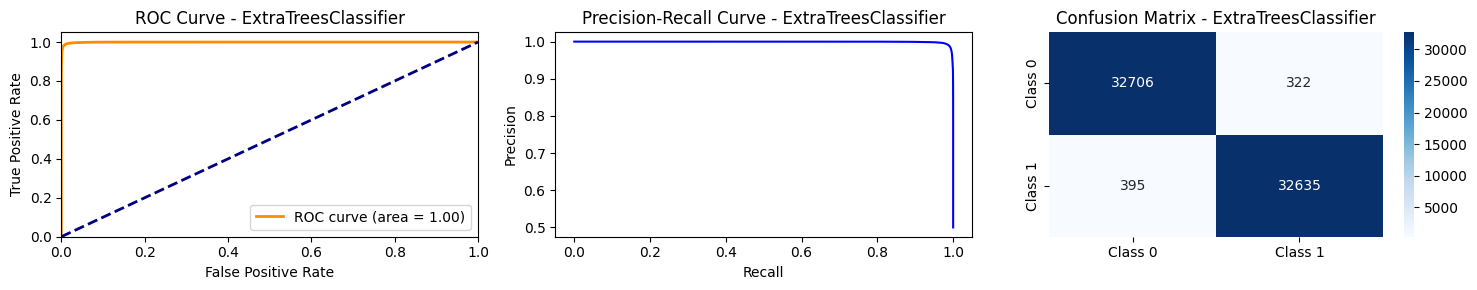

In [59]:
train_model(etc, train_x, test_x, train_y, test_y)

## Gradient Boosting with SMOTE

In [60]:
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

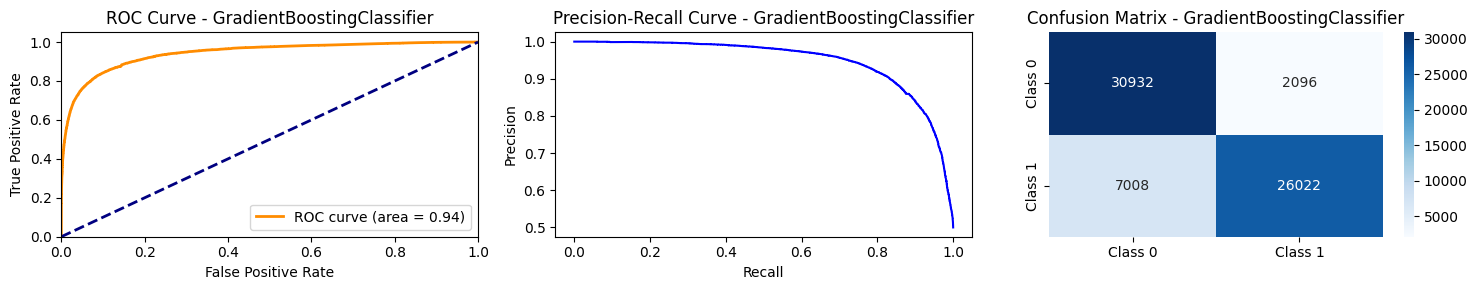

In [61]:
train_model(gbdt, train_x, test_x, train_y, test_y)

## XG Boost

In [62]:
xgb = XGBClassifier(n_estimators=50,random_state=2)

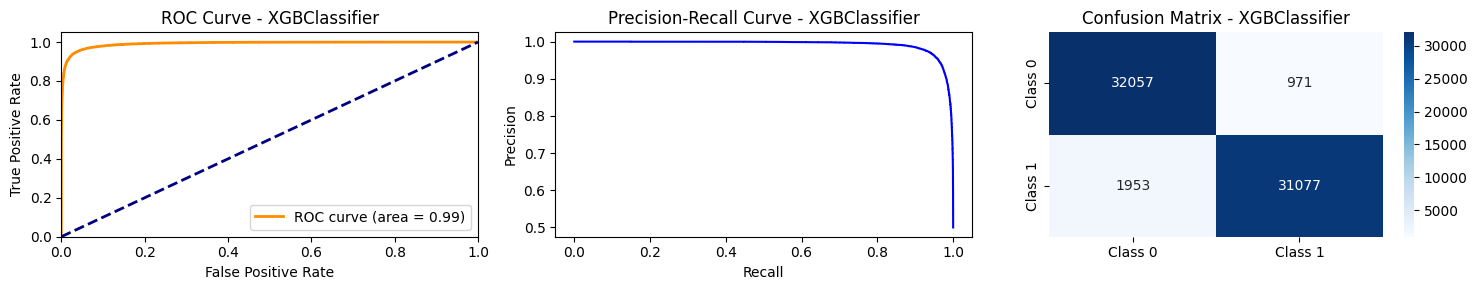

In [63]:
train_model(xgb, train_x, test_x, train_y, test_y)